In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

accuracy = 0.7
Coefficients:  [-6.27346737] [[2.43628383]]


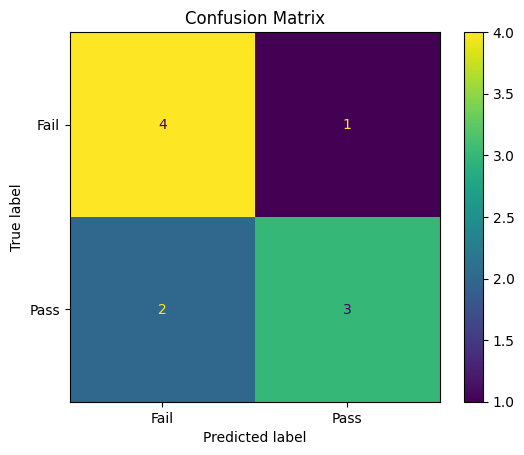

In [ ]:
x = np.array([4.2,2.2,3.5,2.5,5.1,1.3,3.0,1.8,2.4,1.5]).reshape(-1,1);
y = np.array([1,0,1,1,1,0,0,0,1,0]);

model = LogisticRegression(solver='newton-cg', random_state=0,penalty=None).fit(x, y)
print(f"accuracy = {model.score(x, y)}")
print(f"Coefficients: ", model.intercept_, model.coef_)
cfm = confusion_matrix(y, model.predict(x))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Fail", "Pass"])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

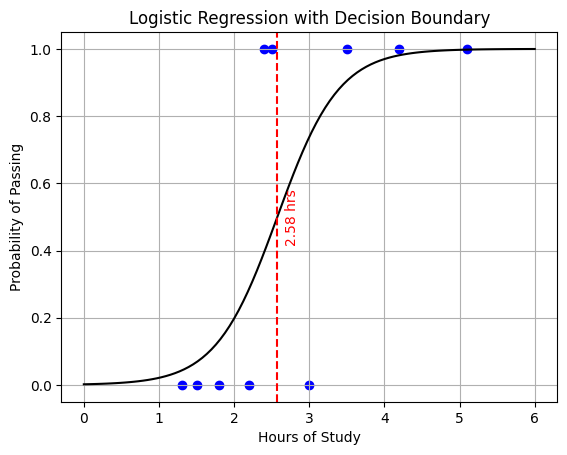

In [ ]:
plt.scatter(x, y, color='b', label='Data Points')
x2 = np.linspace(0, 6, 100).reshape(-1, 1)
y2 = model.predict_proba(x2)
plt.plot(x2, y2[:, 1], color='k', label='Logistic Curve')

# Calculate the decision boundary
decision_boundary = -model.intercept_[0] / model.coef_[0][0]

# Add a vertical dashed line for the decision boundary
plt.axvline(x=decision_boundary, color='r', linestyle='--', label=f'Decision Boundary: {decision_boundary:.2f} hrs')

# Annotate the decision boundary
plt.text(decision_boundary + 0.1, 0.5, f'{decision_boundary:.2f} hrs', color='r', rotation=90, verticalalignment='center')

# Add grid, labels, legend, and title
plt.grid()
plt.xlabel('Hours of Study')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression with Decision Boundary')
plt.show()

AUC:  0.92


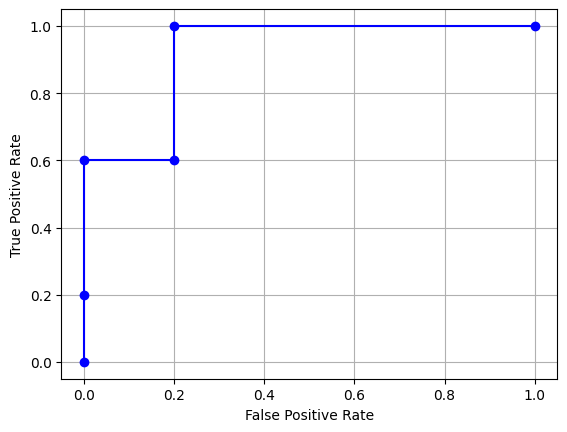

In [ ]:
y2 = model.predict_proba(x)
fpr, tpr, thresholds = metrics.roc_curve(y, y2[:,1])
print(f"AUC: ",metrics.roc_auc_score(y, y2[:,1]))
plt.plot(fpr,tpr,'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()